In [2]:
from glob import iglob
import os
import shutil
import torch.nn as nn
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms
import pandas as pd
from PIL import Image
import torchvision
import numpy as np

#get all the file names in a folder
folderpath = "CXR_png"

In [3]:
lst_filenames = [os.path.basename(f) for f in  iglob(folderpath+"\\"+"*.png")]

In [4]:
lst_filenames[:5]

['CHNCXR_0001_0.png',
 'CHNCXR_0002_0.png',
 'CHNCXR_0003_0.png',
 'CHNCXR_0004_0.png',
 'CHNCXR_0005_0.png']

In [5]:
## iterating through all the filenames and filtering

lst_ones = []
lst_zeros = []

for eachfile in lst_filenames:

    filesplit = eachfile.split(".")
    class_category = filesplit[0][-1]

    if class_category == "1":
        lst_ones.append(eachfile)
    else:
        lst_zeros.append(eachfile)

In [6]:
len(lst_zeros)

326

In [7]:
print(lst_ones)

['CHNCXR_0327_1.png', 'CHNCXR_0328_1.png', 'CHNCXR_0329_1.png', 'CHNCXR_0330_1.png', 'CHNCXR_0331_1.png', 'CHNCXR_0332_1.png', 'CHNCXR_0333_1.png', 'CHNCXR_0334_1.png', 'CHNCXR_0335_1.png', 'CHNCXR_0336_1.png', 'CHNCXR_0337_1.png', 'CHNCXR_0338_1.png', 'CHNCXR_0339_1.png', 'CHNCXR_0340_1.png', 'CHNCXR_0341_1.png', 'CHNCXR_0342_1.png', 'CHNCXR_0343_1.png', 'CHNCXR_0344_1.png', 'CHNCXR_0345_1.png', 'CHNCXR_0346_1.png', 'CHNCXR_0347_1.png', 'CHNCXR_0348_1.png', 'CHNCXR_0349_1.png', 'CHNCXR_0350_1.png', 'CHNCXR_0351_1.png', 'CHNCXR_0352_1.png', 'CHNCXR_0353_1.png', 'CHNCXR_0354_1.png', 'CHNCXR_0355_1.png', 'CHNCXR_0356_1.png', 'CHNCXR_0357_1.png', 'CHNCXR_0358_1.png', 'CHNCXR_0359_1.png', 'CHNCXR_0360_1.png', 'CHNCXR_0361_1.png', 'CHNCXR_0362_1.png', 'CHNCXR_0363_1.png', 'CHNCXR_0364_1.png', 'CHNCXR_0365_1.png', 'CHNCXR_0366_1.png', 'CHNCXR_0367_1.png', 'CHNCXR_0368_1.png', 'CHNCXR_0369_1.png', 'CHNCXR_0370_1.png', 'CHNCXR_0371_1.png', 'CHNCXR_0372_1.png', 'CHNCXR_0373_1.png', 'CHNCXR_0374

In [8]:

main_folder = "images"
normal_folder = os.path.join(main_folder, "normal")
abnormal_folder = os.path.join(main_folder, "abnormal")

#create datafolder

if not os.path.exists(main_folder):
    os.mkdir(main_folder)
if not os.path.exists(normal_folder):
    os.mkdir(normal_folder)
if not os.path.exists(abnormal_folder):
    os.mkdir(abnormal_folder)

In [9]:
#copying all the images to respective folder

for filename in lst_zeros:
    source_path = os.path.join(folderpath, filename)
    destination_path = normal_folder
    
    #copying the images to the destination folder
    shutil.copy(source_path, destination_path)

In [10]:
#copying all the images to respective folder

for filename in lst_ones:
    source_path = os.path.join(folderpath, filename)
    destination_path = abnormal_folder
    
    #copying the images to the destination folder
    shutil.copy(source_path, destination_path)

# Dataset, transforms, and visualisation

In [11]:
transform = transforms.Compose([
    transforms.RandomResizedCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])



In [96]:
#define the batchsize
training_batchsize = 5

In [97]:
num_classes=2

In [98]:
#retrieve the full data
full_data = datasets.ImageFolder(main_folder, transform=transform)

In [99]:
#split the training data into train and validation

train_size = int(0.9 * len(full_data))
test_size = len(full_data) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(full_data, [train_size, test_size])

In [100]:
#create a dataloader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=training_batchsize, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=training_batchsize, shuffle=True)

# Visualizing the train images

In [101]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([5, 3, 224, 224])
torch.Size([3, 224, 224])
0


In [102]:
def imshow(img, title):
    
    #convert image from tensor to numpy for visualization
    npimg = img.numpy() / 2 + 0.5
    #define the size of a figure
    plt.figure(figsize = (10, 10))
    plt.axis("off")
    
    #interchaging the image sizes - transposing
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title, fontsize=15)
    plt.show()

In [103]:
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])

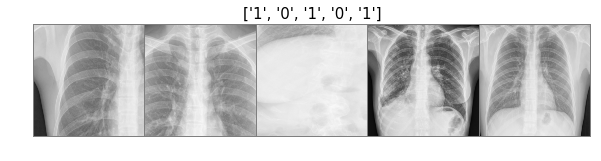

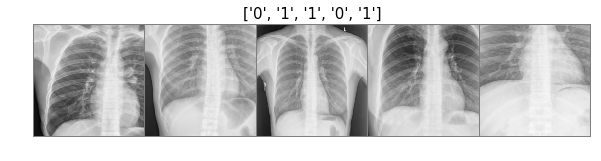

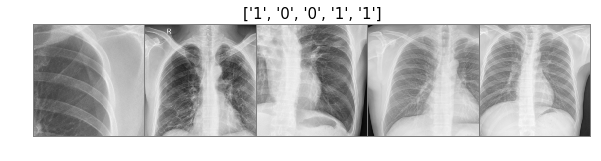

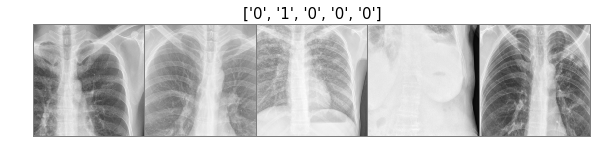

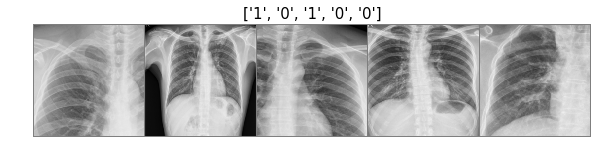

In [104]:
for i in range(5):
    show_batch_images(train_loader)

In [105]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


# Freezing layers of VGG-19

In [106]:
from torchvision import models

In [107]:
vgg = models.vgg19_bn(pretrained=True)

In [108]:
for param in vgg.parameters():
    param.requires_grad =False

In [109]:
final_in_features = vgg.classifier[6].in_features
vgg.classifier[6] = nn.Linear(final_in_features, num_classes)

In [110]:
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.Adam(vgg.parameters(), lr=1e-4, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-5, amsgrad=False)

In [111]:
def evaluation(dataloader, model):
    y_score=[]
    y=[]
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return  100 * correct / total

# With model copies

In [113]:
import copy

In [116]:
loss_epoch_arr = []
max_epochs = 4

min_loss = 1000

n_iters = np.ceil(50000/training_batchsize)

for epoch in range(max_epochs):

    for i, data in enumerate(train_loader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = vgg(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        if min_loss > loss.item():
            min_loss = loss.item()
            best_model = copy.deepcopy(vgg.state_dict())
            print('Min loss %0.2f' % min_loss)
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
    loss_epoch_arr.append(loss.item())

Min loss 0.77
Iteration: 0/10000, Loss: 0.77
Min loss 0.72
Min loss 0.63
Min loss 0.60
Min loss 0.55
Min loss 0.48
Min loss 0.47
Iteration: 100/10000, Loss: 0.55
Iteration: 0/10000, Loss: 0.49
Min loss 0.44
Min loss 0.40
Min loss 0.40
Min loss 0.31
Iteration: 100/10000, Loss: 0.71
Iteration: 0/10000, Loss: 0.64
Min loss 0.27
Iteration: 100/10000, Loss: 0.77
Iteration: 0/10000, Loss: 0.53
Iteration: 100/10000, Loss: 0.59


In [117]:
vgg.load_state_dict(best_model)
print(evaluation(train_loader, vgg), evaluation(test_loader, vgg))

66.5546218487395 71.64179104477611


In [118]:
torch.save(vgg.state_dict(best_model),"saved.pth")

In [158]:
def auc_evaluation(dataloader,model):
    y_score=[]
    y=[]
    for data in dataloader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        c = (predicted == labels).squeeze().cpu().numpy()
        y_score.append(outputs.cpu())
        y.append(labels.cpu().numpy())
    return y_score,y

In [120]:
y_score,y=auc_evaluation(test_loader,vgg)

In [121]:
y_score_new = y_score[0].detach().numpy()

In [122]:
print(y_score_new)

[[-0.0692439  -0.19464077]
 [-0.5932775   0.63198406]
 [-0.24800062 -0.47805968]
 [ 0.6509946  -0.53227735]
 [ 0.17914376 -0.15247911]]


In [123]:
y_new=np.array(y)

In [125]:
print(y_new)

[array([1, 1, 0, 0, 0], dtype=int64) array([1, 1, 0, 0, 1], dtype=int64)
 array([0, 0, 1, 0, 0], dtype=int64) array([1, 0, 0, 1, 0], dtype=int64)
 array([0, 1, 1, 0, 0], dtype=int64) array([0, 1, 0, 1, 1], dtype=int64)
 array([1, 1, 0, 1, 0], dtype=int64) array([1, 0, 1, 0, 1], dtype=int64)
 array([0, 1, 1, 1, 1], dtype=int64) array([1, 0, 0, 0, 0], dtype=int64)
 array([1, 0, 1, 1, 1], dtype=int64) array([1, 0, 1, 0, 0], dtype=int64)
 array([1, 1, 0, 0, 1], dtype=int64) array([1, 0], dtype=int64)]


# ResNet 50

In [127]:
resnet = models.resnet50(pretrained=True)

In [128]:
for param in resnet.parameters():
    param.requires_grad = False

In [129]:
in_features = resnet.fc.in_features
resnet.fc = nn.Linear(in_features, num_classes)

In [130]:
resnet = resnet.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.Adam(resnet.parameters(), lr=1e-4, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-5, amsgrad=False)

Min loss 0.41
Iteration: 0/10000, Loss: 0.41
Min loss 0.40
Min loss 0.39
Iteration: 100/10000, Loss: 0.67
Min loss 0.37
Epoch: 0/5, Test acc: 74.63, Train acc: 67.39
Iteration: 0/10000, Loss: 0.69
Min loss 0.36
Min loss 0.35
Iteration: 100/10000, Loss: 0.42
Epoch: 1/5, Test acc: 82.09, Train acc: 74.29
Iteration: 0/10000, Loss: 0.75
Iteration: 100/10000, Loss: 0.41
Epoch: 2/5, Test acc: 65.67, Train acc: 68.57
Iteration: 0/10000, Loss: 0.77
Min loss 0.33
Min loss 0.31
Min loss 0.29
Min loss 0.25
Iteration: 100/10000, Loss: 0.62
Epoch: 3/5, Test acc: 73.13, Train acc: 72.27
Iteration: 0/10000, Loss: 0.38
Iteration: 100/10000, Loss: 0.60
Epoch: 4/5, Test acc: 80.60, Train acc: 71.93


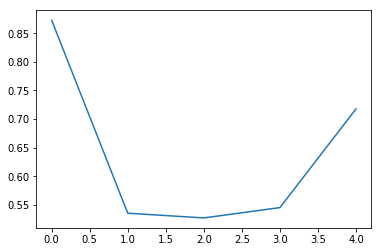

In [39]:
loss_epoch_arr = []
max_epochs = 5

min_loss = 1000

n_iters = np.ceil(50000/training_batchsize)

for epoch in range(max_epochs):

    for i, data in enumerate(train_loader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = resnet(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        if min_loss > loss.item():
            min_loss = loss.item()
            best_model = copy.deepcopy(resnet.state_dict())
            print('Min loss %0.2f' % min_loss)
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs, 
        evaluation(test_loader, resnet), evaluation(train_loader, resnet)))
    
    
plt.plot(loss_epoch_arr)
plt.show()  

In [40]:
resnet.load_state_dict(best_model)
print(evaluation(train_loader, resnet), evaluation(test_loader, resnet))

72.94117647058823 77.61194029850746


In [41]:
torch.save(resnet.state_dict(best_model),"saved.pth")

In [131]:
y_score_res,y_res=auc_evaluation(test_loader,resnet)

In [132]:
y_score_res_new=y_score_res[0].detach().numpy()

In [136]:
y_res_new=np.array(y_res)

In [137]:
print(y_score_res_new)

[[ 0.03919892 -0.25594288]
 [ 0.16459706 -0.2574227 ]
 [ 0.01585001 -0.51863354]
 [-0.26902434 -0.14738892]
 [ 0.11635958 -0.47134364]]


In [139]:
print(y_res_new)

[array([1, 1, 1, 1, 0], dtype=int64) array([1, 0, 0, 1, 1], dtype=int64)
 array([0, 1, 0, 0, 0], dtype=int64) array([1, 1, 1, 0, 0], dtype=int64)
 array([0, 0, 1, 1, 1], dtype=int64) array([0, 1, 1, 1, 0], dtype=int64)
 array([0, 1, 0, 0, 1], dtype=int64) array([1, 1, 1, 1, 1], dtype=int64)
 array([1, 0, 1, 1, 0], dtype=int64) array([1, 0, 0, 0, 1], dtype=int64)
 array([0, 0, 0, 1, 0], dtype=int64) array([0, 0, 0, 0, 1], dtype=int64)
 array([0, 1, 0, 1, 1], dtype=int64) array([0, 0], dtype=int64)]


# Inception-V3 Networks

In [140]:
inception = models.inception_v3(pretrained=True)

In [141]:
transform = transforms.Compose([
    transforms.RandomResizedCrop(299), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])



In [142]:
#retrieve the full data
full_data = datasets.ImageFolder(main_folder, transform=transform)

In [143]:
#split the training data into train and validation

train_size = int(0.9 * len(full_data))
test_size = len(full_data) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(full_data, [train_size, test_size])

In [144]:
#create a dataloader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=training_batchsize, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=training_batchsize, shuffle=True)

In [145]:
for param in inception.parameters():
    param.requires_grad = False

In [146]:
aux_in_features = inception.AuxLogits.fc.in_features
inception.AuxLogits.fc = nn.Linear(aux_in_features, num_classes)

In [147]:
in_features = inception.fc.in_features
inception.fc = nn.Linear(in_features, num_classes)

In [148]:
inception = inception.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.Adam(inception.parameters(), lr=1e-4, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-5, amsgrad=False)

In [149]:
def evaluation_inception(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs, aux_outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [150]:
def auc_inception(dataloader,model):
    y_score_inception=[]
    y_inception=[]
    for data in dataloader:
        inputs, labels = data
        outputs, aux_outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        c = (predicted == labels).squeeze().cpu().numpy()
        y_score_inception.append(outputs.cpu())
        y_inception.append(labels.cpu().numpy())
    return y_score_inception,y_inception

Min loss 1.00
Iteration: 0/10000, Loss: 1.00
Min loss 0.81
Min loss 0.76
Min loss 0.74
Min loss 0.69
Iteration: 100/10000, Loss: 1.03
Epoch: 0/5, Test acc: 53.73, Train acc: 55.46
Iteration: 0/10000, Loss: 1.02
Min loss 0.69
Min loss 0.58
Iteration: 100/10000, Loss: 0.74
Epoch: 1/5, Test acc: 43.28, Train acc: 57.48
Iteration: 0/10000, Loss: 0.86
Iteration: 100/10000, Loss: 0.94
Epoch: 2/5, Test acc: 64.18, Train acc: 62.69
Iteration: 0/10000, Loss: 0.88
Iteration: 100/10000, Loss: 1.01
Epoch: 3/5, Test acc: 59.70, Train acc: 60.34
Iteration: 0/10000, Loss: 0.70
Min loss 0.55
Iteration: 100/10000, Loss: 0.72
Epoch: 4/5, Test acc: 56.72, Train acc: 60.50


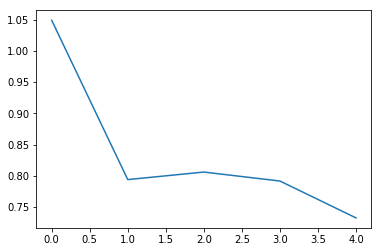

In [97]:
loss_epoch_arr = []
max_epochs = 5

min_loss = 1000

n_iters = np.ceil(50000/training_batchsize)

for epoch in range(max_epochs):

    for i, data in enumerate(train_loader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs, aux_outputs = inception(inputs)
        loss = loss_fn(outputs, labels) + 0.3 * loss_fn(aux_outputs, labels)
        loss.backward()
        opt.step()
        
        if min_loss > loss.item():
            min_loss = loss.item()
            best_model = copy.deepcopy(inception.state_dict())
            print('Min loss %0.2f' % min_loss)
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs, 
        evaluation_inception(test_loader, inception), 
        evaluation_inception(train_loader, inception)))
    
plt.plot(loss_epoch_arr)
plt.show()   

In [98]:
inception.load_state_dict(best_model)
print(evaluation_inception(train_loader, inception), evaluation_inception(test_loader, inception))

66.05042016806723 62.6865671641791


In [152]:
y_score_incep,y_incep=auc_inception(test_loader,inception)

In [153]:
y_score_incep_new=y_score_incep[0].detach().numpy()

In [155]:
y_incep_new=np.array(y_incep)

In [156]:
print(y_score_incep_new)

[[-0.03670771  0.08874721]
 [-0.24269955  0.20934208]
 [ 0.00824358 -0.0724166 ]
 [-0.05814501  0.00794861]
 [-0.4041305  -0.15281788]]


In [157]:
print(y_incep_new)

[array([1, 0, 0, 1, 1], dtype=int64) array([0, 0, 1, 1, 0], dtype=int64)
 array([0, 0, 0, 0, 0], dtype=int64) array([1, 1, 0, 1, 0], dtype=int64)
 array([1, 1, 0, 1, 1], dtype=int64) array([0, 1, 0, 1, 0], dtype=int64)
 array([0, 0, 0, 0, 0], dtype=int64) array([0, 0, 1, 1, 0], dtype=int64)
 array([1, 0, 0, 1, 1], dtype=int64) array([0, 1, 1, 1, 0], dtype=int64)
 array([0, 0, 0, 1, 1], dtype=int64) array([1, 0, 1, 0, 0], dtype=int64)
 array([0, 0, 0, 0, 0], dtype=int64) array([1, 1], dtype=int64)]


# Conclusion

In [1]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable



x = PrettyTable()
x.field_names = ["CNN Architecture","train_auc","test_auc"]
x.add_row(["VGG-19",66.55,71.64])
x.add_row(["ResNet 50",72.94,77.61])
x.add_row(["Inception V3-Network", 66.05,62.68])
print(x)

+----------------------+-----------+----------+
|   CNN Architecture   | train_auc | test_auc |
+----------------------+-----------+----------+
|        VGG-19        |   66.55   |  71.64   |
|      ResNet 50       |   72.94   |  77.61   |
| Inception V3-Network |   66.05   |  62.68   |
+----------------------+-----------+----------+
